<a href="https://colab.research.google.com/github/SanjayBhargavKudupudi/DATA_MINING/blob/main/graph/graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Replace with the correct path after uploading to Colab
df1 = pd.read_csv('/content/drive/MyDrive/DATA_MINING_DATASETS/graph/supervised_dataset.csv')
df2 = pd.read_csv('/content/drive/MyDrive/DATA_MINING_DATASETS/graph/remaining_behavior_ext.csv')


In [ ]:
# Display the first few rows of the datasets
print(df1.head())
print(df2.head())

# Dataset summaries
print(df1.info())
print(df2.info())

# Statistical summary
print(df1.describe())
print(df2.describe())


   Unnamed: 0                                   _id  \
0           0  1f2c32d8-2d6e-3b68-bc46-789469f2b71e   
1           1  4c486414-d4f5-33f6-b485-24a8ed2925e8   
2           2  7e5838fc-bce1-371f-a3ac-d8a0b2a05d9a   
3           3  82661ecd-d87f-3dff-855e-378f7cb6d912   
4           4  d62d56ea-775e-328c-8b08-db7ad7f834e5   

   inter_api_access_duration(sec)  api_access_uniqueness  \
0                        0.000812               0.004066   
1                        0.000063               0.002211   
2                        0.004481               0.015324   
3                        0.017837               0.014974   
4                        0.000797               0.006056   

   sequence_length(count)  vsession_duration(min)  ip_type  num_sessions  \
0               85.643243                    5405  default        1460.0   
1               16.166805                     519  default        9299.0   
2               99.573276                    6211  default         255.0   
3   

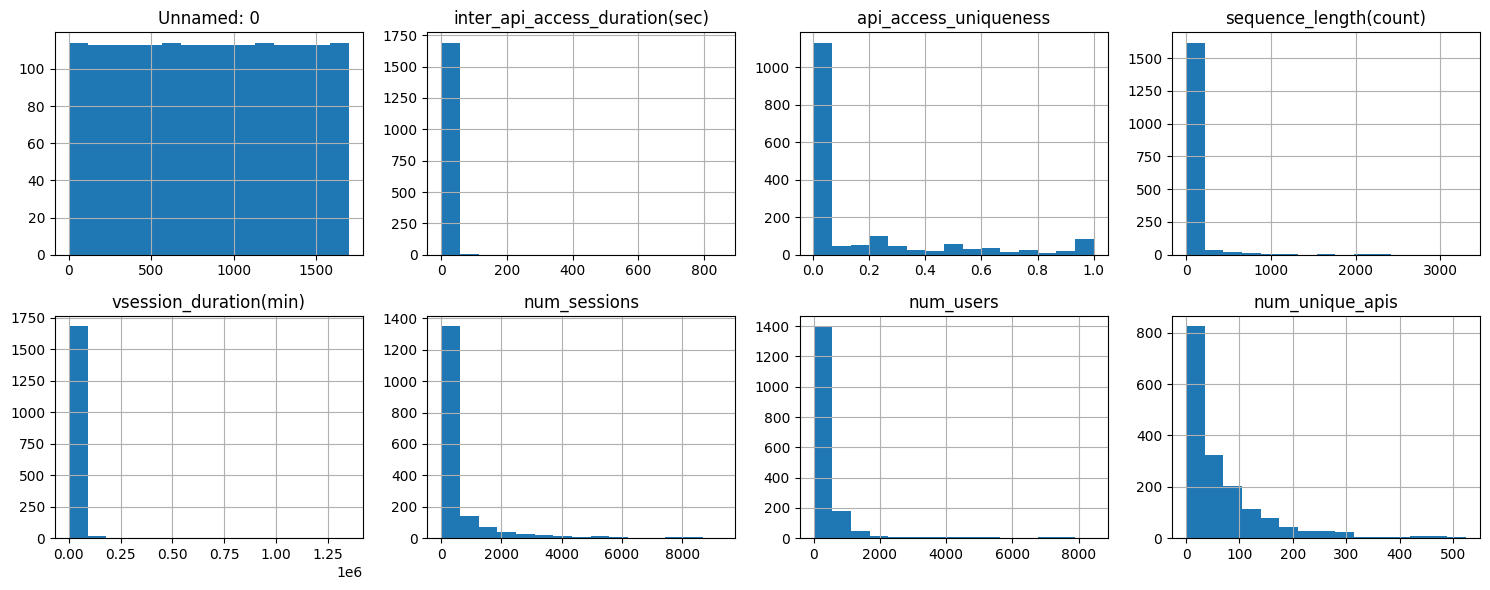

In [ ]:
df1.select_dtypes(include=[np.number]).hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.tight_layout()
plt.show()


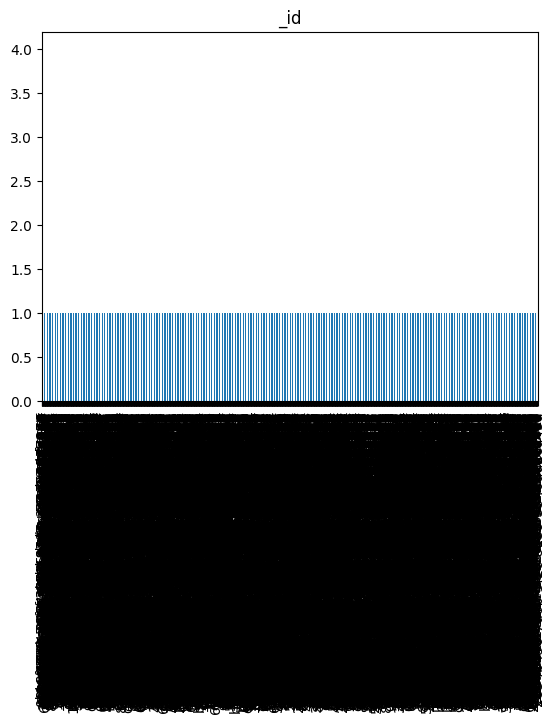

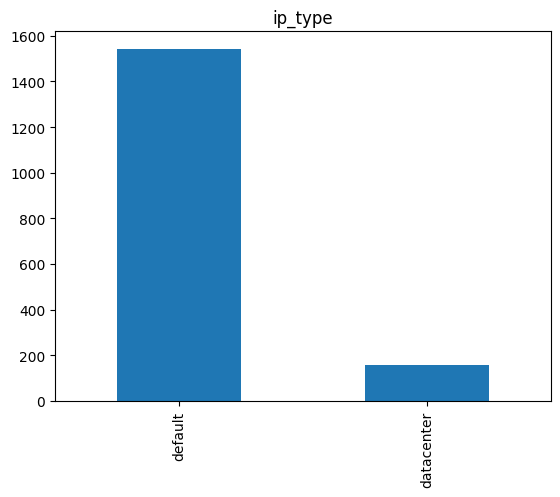

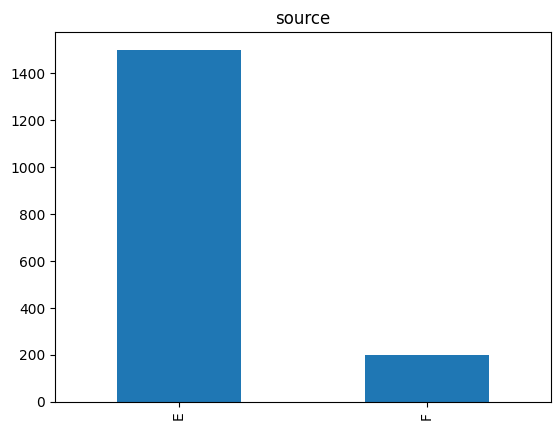

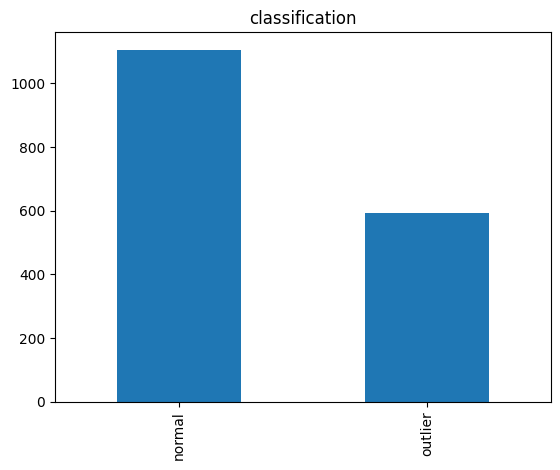

In [ ]:
categorical_cols = df1.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df1[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()


<ipython-input-8-d977a5bf6a14>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, fmt=".2f")


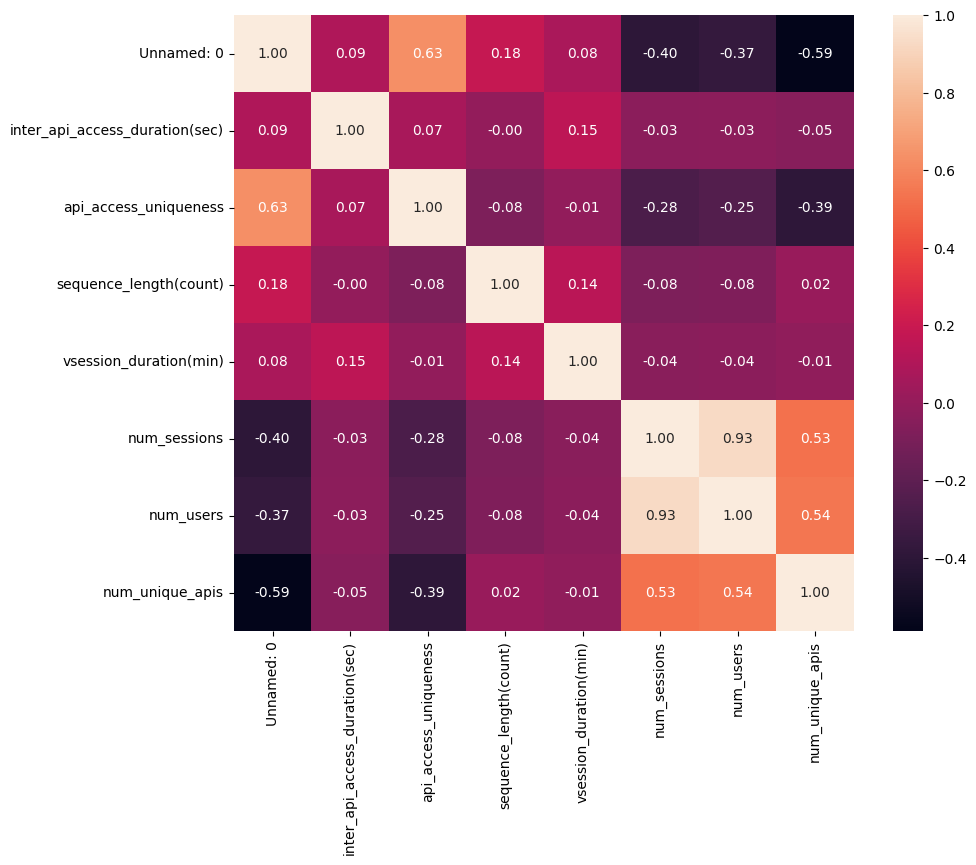

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, fmt=".2f")
plt.show()


In [ ]:
# Check for missing values
print(df1.isnull().sum())
print(df2.isnull().sum())


Unnamed: 0                        0
_id                               0
inter_api_access_duration(sec)    4
api_access_uniqueness             4
sequence_length(count)            0
vsession_duration(min)            0
ip_type                           0
num_sessions                      0
num_users                         0
num_unique_apis                   0
source                            0
classification                    0
dtype: int64
Unnamed: 0                        0
_id                               0
inter_api_access_duration(sec)    1
api_access_uniqueness             1
sequence_length(count)            0
vsession_duration(min)            0
ip_type                           0
behavior                          0
behavior_type                     0
num_sessions                      0
num_users                         0
num_unique_apis                   0
source                            0
dtype: int64


In [ ]:
Q1 = df1['num_sessions'].quantile(0.25)
Q3 = df1['num_users'].quantile(0.75)
IQR = Q3 - Q1
filter = (df1['num_users'] >= Q1 - 1.5 * IQR) & (df1['num_sessions'] <= Q3 + 1.5 * IQR)
df1_filtered = df1.loc[filter]


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1['num_user'] = scaler.fit_transform(df1[['num_sessions']])


In [ ]:
import pandas as pd
import numpy as np

# Load your dataset
df1 = pd.read_csv('/content/drive/MyDrive/DATA_MINING_DATASETS/graph/supervised_dataset.csv')  # Adjust the path to your dataset

# Your operation
df1['_id'] = np.log(df1['num_users'] + 1)

# Continue with your code...





In [ ]:
df1 = pd.get_dummies(df1, drop_first=True)  # Convert categorical variables to dummy/indicator variables



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)




In [ ]:
# Assuming 'df1' still holds the original data with column names
df1_scaled_df = pd.DataFrame(df1_scaled, columns=df1.columns)




In [ ]:
print(df1_scaled_df.columns)



Index(['Unnamed: 0', '_id', 'inter_api_access_duration(sec)',
       'api_access_uniqueness', 'sequence_length(count)',
       'vsession_duration(min)', 'num_sessions', 'num_users',
       'num_unique_apis', 'ip_type_default', 'source_F',
       'classification_outlier'],
      dtype='object')


In [ ]:
import pandas as pd

# Load the dataset
df1 = pd.read_csv('/content/drive/MyDrive/DATA_MINING_DATASETS/graph/supervised_dataset.csv')

# Display the first few rows of the dataframe
df1.head()


,Unnamed: 0,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification
0,0,1f2c32d8-2d6e-3b68-bc46-789469f2b71e,0.000812,0.004066,85.643243,5405,default,1460.0,1295.0,451.0,E,normal
1,1,4c486414-d4f5-33f6-b485-24a8ed2925e8,0.000063,0.002211,16.166805,519,default,9299.0,8447.0,302.0,E,normal
2,2,7e5838fc-bce1-371f-a3ac-d8a0b2a05d9a,0.004481,0.015324,99.573276,6211,default,255.0,232.0,354.0,E,normal
3,3,82661ecd-d87f-3dff-855e-378f7cb6d912,0.017837,0.014974,69.792793,8292,default,195.0,111.0,116.0,E,normal
4,4,d62d56ea-775e-328c-8b08-db7ad7f834e5,0.000797,0.006056,14.952756,182,default,272.0,254.0,23.0,E,normal


In [ ]:
# Removing non-numeric columns
df1_numeric = df1.select_dtypes(include=[np.number])

# Now apply K-Means



In [ ]:
# Encoding categorical variables
df_encoded = pd.get_dummies(df1)

# Now apply K-Means


In [ ]:
from sklearn.impute import SimpleImputer

# Imputer for numeric values
imputer = SimpleImputer(strategy='median')
df_encoded_imputed = imputer.fit_transform(df_encoded)

# The output is a NumPy array, so convert it back to DataFrame
df_encoded_imputed = pd.DataFrame(df_encoded_imputed, columns=df_encoded.columns)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

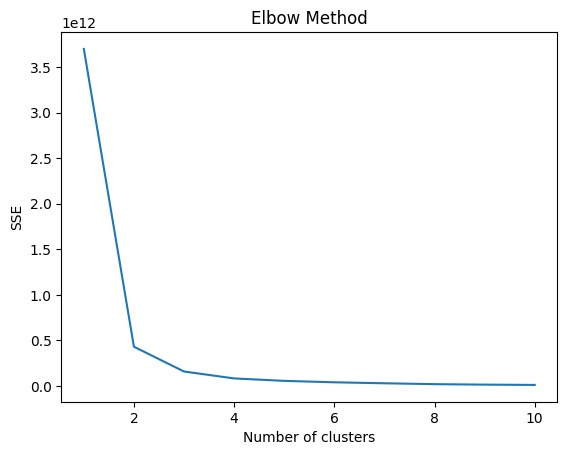

In [ ]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_encoded_imputed)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


In [ ]:
# Assuming you choose 3 clusters as an example
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df_encoded_imputed['Cluster'] = kmeans.fit_predict(df_encoded_imputed)

# Analyze the result
print(df_encoded_imputed.groupby('Cluster').mean())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


          Unnamed: 0  inter_api_access_duration(sec)  api_access_uniqueness  \
Cluster                                                                       
0         837.208434                        0.494924               0.170751   
1        1393.000000                       30.340905               0.038997   
2        1348.621622                       44.923198               0.274820   

         sequence_length(count)  vsession_duration(min)  num_sessions  \
Cluster                                                                 
0                     58.203988            2.632934e+03    577.930723   
1                    706.000000            1.283699e+06      5.500000   
2                    181.378378            8.929954e+04      2.567568   

         num_users  num_unique_apis  _id_00041830-3168-3731-8bbc-c6838311da58  \
Cluster                                                                         
0        415.78494        68.116867                                  0.00060

In [ ]:
!pip install h2o
import h2o
h2o.init()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=7804bbc4319fa5cd522a20d93350d704e9653df2a24a78e9d8927b45df5475de
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpywijs22l
  JVM stdout: /tmp/tmpywijs22l/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpywijs22l/h2o_unknownUser_s

H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_unknownUser_h995ik
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# If using a DataFrame, convert it to H2O frame
hf = h2o.H2OFrame(df_encoded_imputed)

# Split the data into training and validation sets
train, valid = hf.split_frame(ratios=[.8], seed=1234)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
from h2o.automl import H2OAutoML

# Identify predictors and target
x = train.columns
y = "num_users"  # replace with your target column
x.remove(y)

# For classification, ensure the target is a factor
train[y] = train[y].asfactor()
valid[y] = valid[y].asfactor()

# Run AutoML
aml = H2OAutoML(max_models=10, seed=1, max_runtime_secs=1000)
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)


AutoML progress: |
04:03:26.722: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
04:03:27.283: _train param, Dropping bad and constant columns: [_id_57d2c64b-42aa-36a9-970a-da5c65cdab7e, _id_6dbe2230-d20b-3166-a162-833f1cbf2580, _id_dc98ec0c-42f0-3004-8088-7bdf2e8505ad, _id_341cfbdd-067c-3b04-8775-f6adfcf93a28, _id_07e28d10-ea82-3b5a-87e7-bda7fc926c96, _id_7c4edbad-f0f8-3043-95df-08f2edd7fa70, _id_d8ac0f74-473a-32c2-b79f-d00d051ddd80, _id_e3af9271-2a84-3ca7-80eb-f426b97f23f7, _id_eb9eaae4-a52f-32a7-8b00-eb034dfcad6e, _id_50e79386-765d-319e-9c99-803fa953152a, _id_ce648ceb-92ae-3e02-8fc4-f78dc60c746e, _id_f86bb6e0-b90c-3703-8510-120afb6bb497, _id_303b1501-d47a-3e3e-9444-45f29d15026a, _id_57f6f1bd-2b31-3455-9154-13d43c624698, _id_7732d572-9edf-3c23-9a85-e4375fd46a69, _id_270c4cd6-3c